# Questions

# What are columns:
- ClientId
- Row
- Seat (unique?)
- Serial = Tickenumber
- Mode
- NewSection
- OldSection
- Result
- ScannerId
- Section
- PackageID
- ServerId

# ?

In [1]:
import pandas as pd
import os
import numpy as np

In [43]:
%matplotlib notebook

In [2]:
current_dir = os.getcwd()

In [3]:
etix_tickets_path = current_dir + "/etix_tickets/"

In [4]:
# load all csv files into dataframe

In [36]:
df_etix = pd.DataFrame()
count = 0
for file in os.listdir(etix_tickets_path):
    if file.split(".")[-1] == 'csv':
        count +=1
        df_tmp = pd.read_csv(etix_tickets_path + file)
        df_tmp['gameid'] = count
        df_etix = pd.concat([df_etix, df_tmp])
df_etix.Date = pd.to_datetime(df_etix.Date, format="%m/%d/%Y %H:%M:%S")

In [37]:
df_tmp.columns

Index(['ClientId', 'Serial', 'Date', 'Mode', 'NewSection', 'OldSection',
       'Result', 'ScannerId', 'Section', 'Row', 'Seat', 'Pricecode',
       'PerformanceId', 'PackageId', 'ServerId', 'gameid'],
      dtype='object')

In [38]:
df_etix.index = df_etix.Date
df_etix.drop("Date", axis = 1, inplace = True)
df_etix.Row = df_etix.Row.astype(str)
df_etix.replace(" ", 0 , inplace = True)
df_etix.Row = df_etix.Row.astype(np.int16)
df_etix.Seat = df_etix.Seat.astype(str)
df_etix.Seat= df_etix.Seat.astype(np.int16)

In [39]:
# possible scanner results

In [41]:
df_etix.Result = df_etix.Result.replace("VALID", 1).replace("EXIT", -1).replace("REENTERED", 1).replace("ALREADY", 0).replace("NOTIN", 0).replace("ALREADYOUT", 0)

In [42]:
df_etix

,ClientId,Serial,Mode,NewSection,OldSection,Result,ScannerId,Section,Row,Seat,Pricecode,PerformanceId,PackageId,ServerId,gameid
Date,,,,,,,,,,,,,,,
2019-05-19 07:10:01,16,100005163755,1,AK,outside,1,B89,60;AB Gast;AB Heim;AK;BMZ;G;I;M;MT;P;PB;ST;TV;...,0,0,999-(AK) JK 2018/19,999999999,-1,3707,1
2019-05-19 07:10:06,16,100005163755,2,outside,AK,-1,B89,60;AB Gast;AB Heim;AK;BMZ;G;I;M;MT;P;PB;ST;TV;...,0,0,999-(AK) JK 2018/19,999999999,-1,3707,1
2019-05-19 07:24:20,16,100005165246,1,AK,outside,1,B89,60;AB Gast;AB Heim;AK;BMZ;G;I;M;MT;P;PB;ST;TV;...,0,0,999-(AK) JK 2018/19,999999999,-1,3707,1
2019-05-19 07:40:19,16,100020263783,1,AK,outside,1,123,60;AB Gast;AK;BMZ;G;I;M;MT;P;PB;ST;TV;L;B;VzP;,0,0,999-(AK) SC Paderborn 07,999999999,-1,3707,1
2019-05-19 07:40:20,16,100020262375,1,AK,outside,1,123,60;AB Gast;AK;BMZ;G;I;M;MT;P;PB;ST;TV;L;B;VzP;,0,0,999-(AK) SC Paderborn 07,999999999,-1,3707,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-08 17:32:01,15,100027821941,2,outside,VIP,-1,C150,AK;BMZ;L;E1E2;,0,0,999-(AK) JK 2019/20,999999999,-1,7189,40
2020-03-08 17:32:07,15,100040334367,2,outside,VIP,-1,C150,AK;BMZ;L;E1E2;,0,0,999-(AK) JK 2019/20,999999999,-1,7189,40
2020-03-08 17:32:11,15,100027821365,2,outside,VIP,-1,C150,AK;BMZ;L;E1E2;,0,0,999-(AK) JK 2019/20,999999999,-1,7189,40


In [68]:
df_etix.loc[df_etix.index.weekday >4]

,ClientId,Serial,Mode,NewSection,OldSection,Result,ScannerId,Section,Row,Seat,Pricecode,PerformanceId,PackageId,ServerId,gameid
Date,,,,,,,,,,,,,,,
2019-05-19 07:10:01,16,100005163755,1,AK,outside,1,B89,60;AB Gast;AB Heim;AK;BMZ;G;I;M;MT;P;PB;ST;TV;...,0,0,999-(AK) JK 2018/19,999999999,-1,3707,1
2019-05-19 07:10:06,16,100005163755,2,outside,AK,-1,B89,60;AB Gast;AB Heim;AK;BMZ;G;I;M;MT;P;PB;ST;TV;...,0,0,999-(AK) JK 2018/19,999999999,-1,3707,1
2019-05-19 07:24:20,16,100005165246,1,AK,outside,1,B89,60;AB Gast;AB Heim;AK;BMZ;G;I;M;MT;P;PB;ST;TV;...,0,0,999-(AK) JK 2018/19,999999999,-1,3707,1
2019-05-19 07:40:19,16,100020263783,1,AK,outside,1,123,60;AB Gast;AK;BMZ;G;I;M;MT;P;PB;ST;TV;L;B;VzP;,0,0,999-(AK) SC Paderborn 07,999999999,-1,3707,1
2019-05-19 07:40:20,16,100020262375,1,AK,outside,1,123,60;AB Gast;AK;BMZ;G;I;M;MT;P;PB;ST;TV;L;B;VzP;,0,0,999-(AK) SC Paderborn 07,999999999,-1,3707,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-08 17:32:01,15,100027821941,2,outside,VIP,-1,C150,AK;BMZ;L;E1E2;,0,0,999-(AK) JK 2019/20,999999999,-1,7189,40
2020-03-08 17:32:07,15,100040334367,2,outside,VIP,-1,C150,AK;BMZ;L;E1E2;,0,0,999-(AK) JK 2019/20,999999999,-1,7189,40
2020-03-08 17:32:11,15,100027821365,2,outside,VIP,-1,C150,AK;BMZ;L;E1E2;,0,0,999-(AK) JK 2019/20,999999999,-1,7189,40


<IPython.core.display.Javascript object>


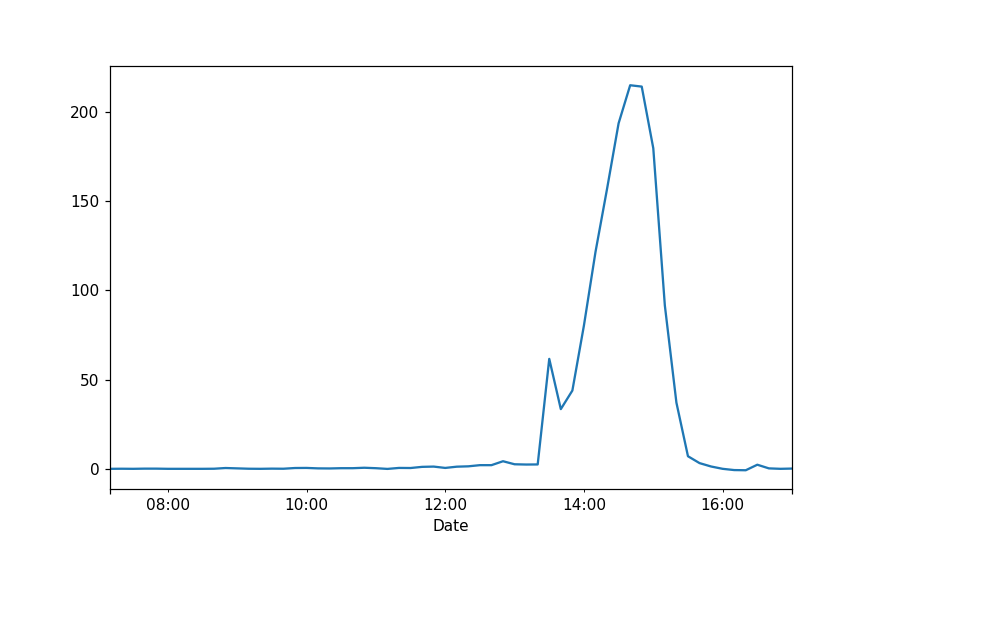

<IPython.core.display.Javascript object>


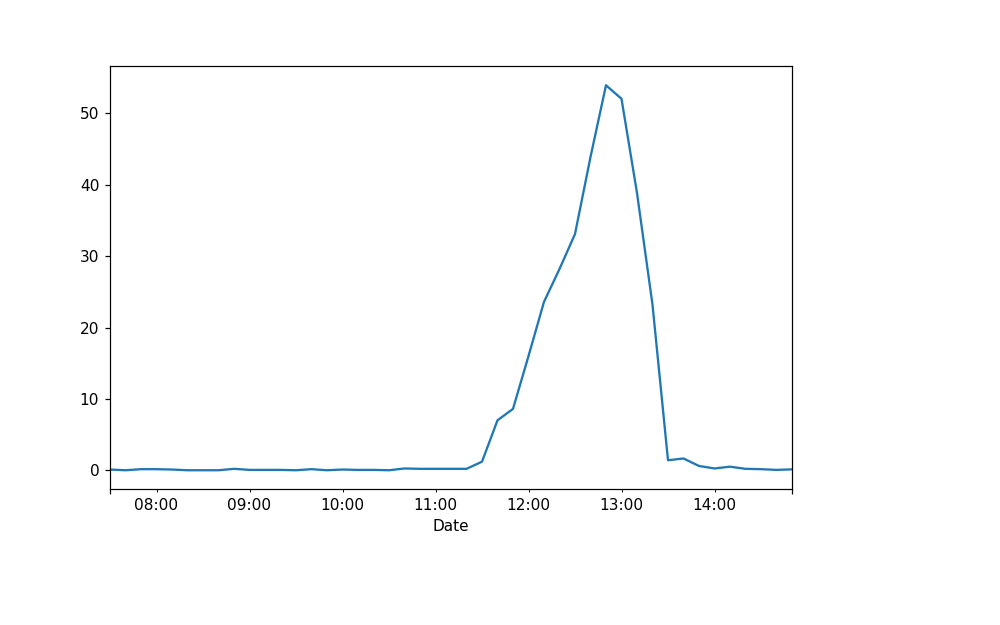

<IPython.core.display.Javascript object>


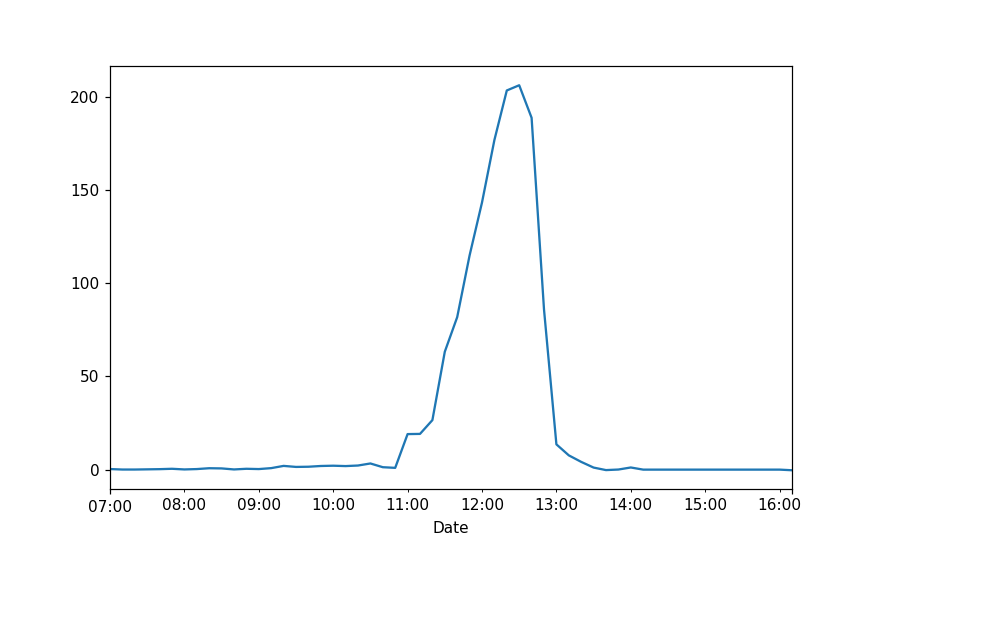

<IPython.core.display.Javascript object>


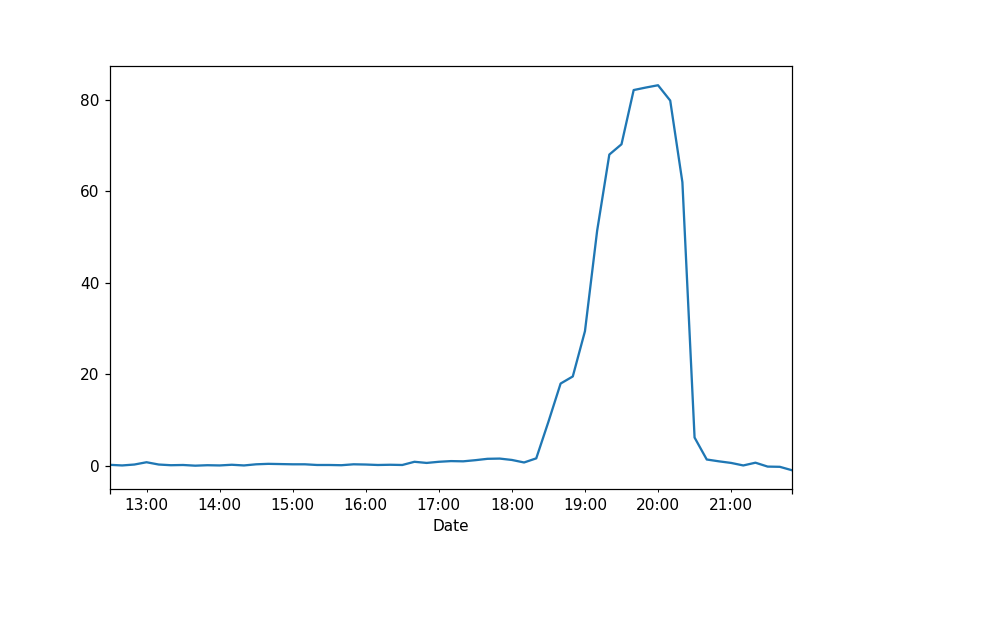

<IPython.core.display.Javascript object>


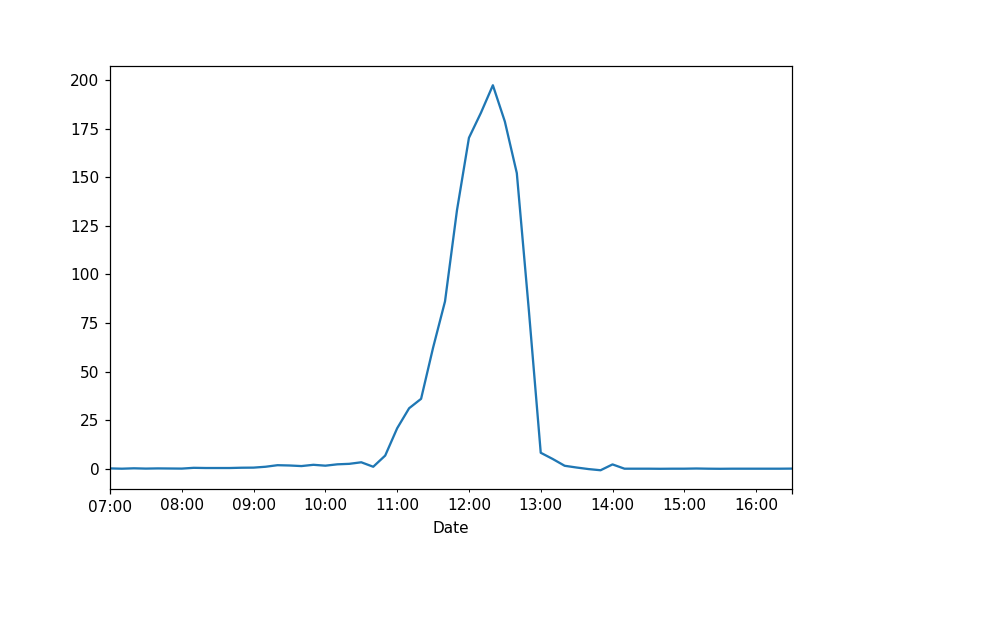

<IPython.core.display.Javascript object>


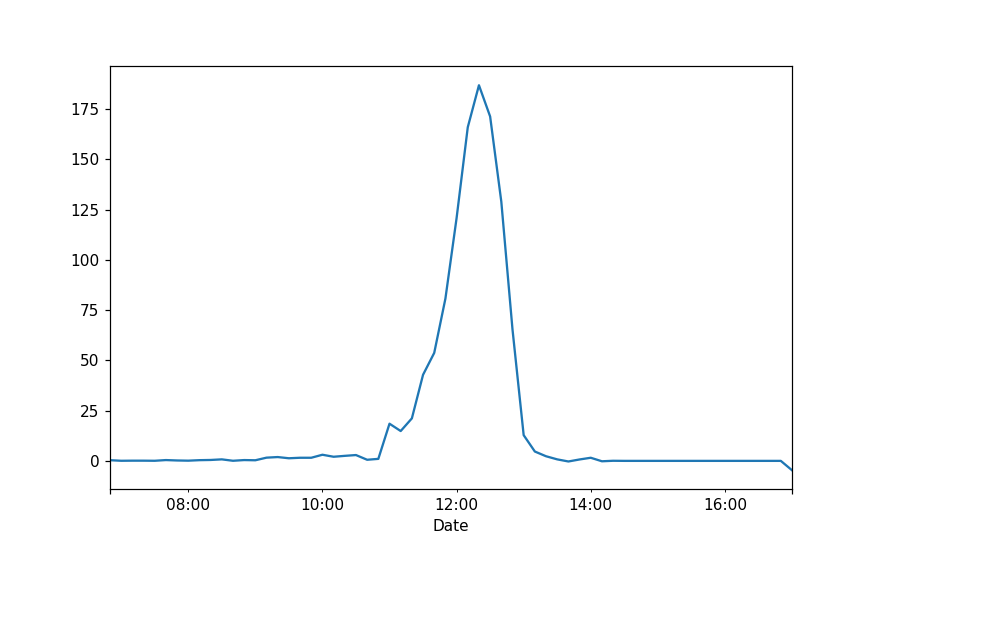

<IPython.core.display.Javascript object>


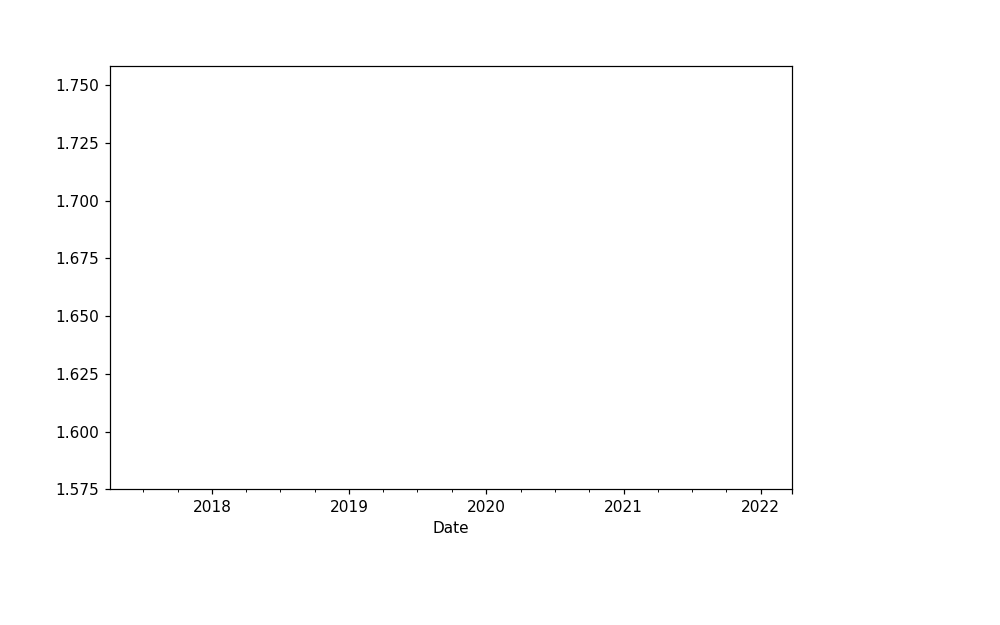

/home/cccoding/anaconda3/envs/coding/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1167: UserWarning: Attempting to set identical left == right == 26161610.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


<IPython.core.display.Javascript object>


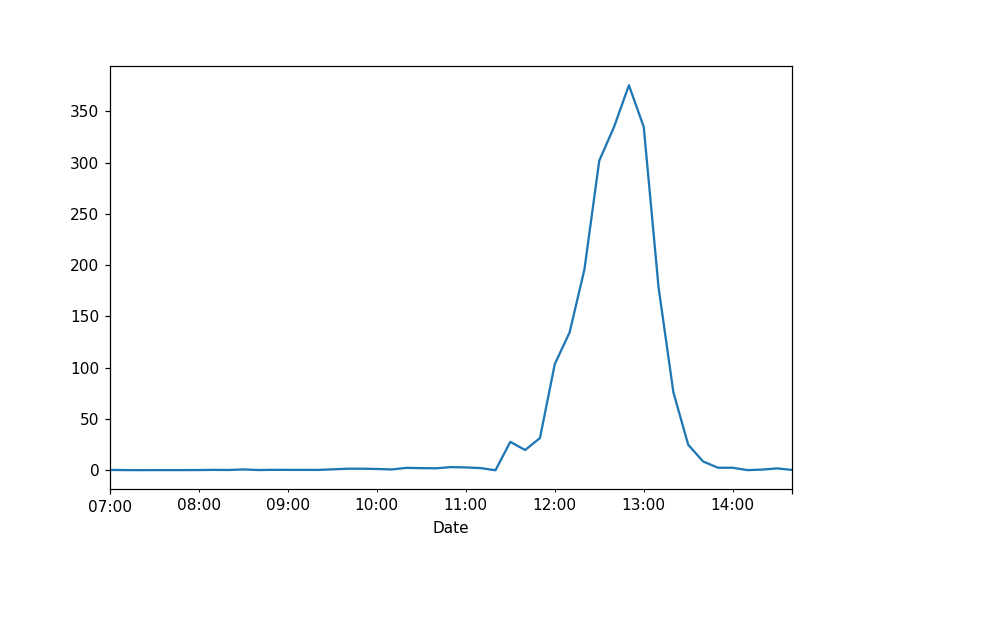

<IPython.core.display.Javascript object>


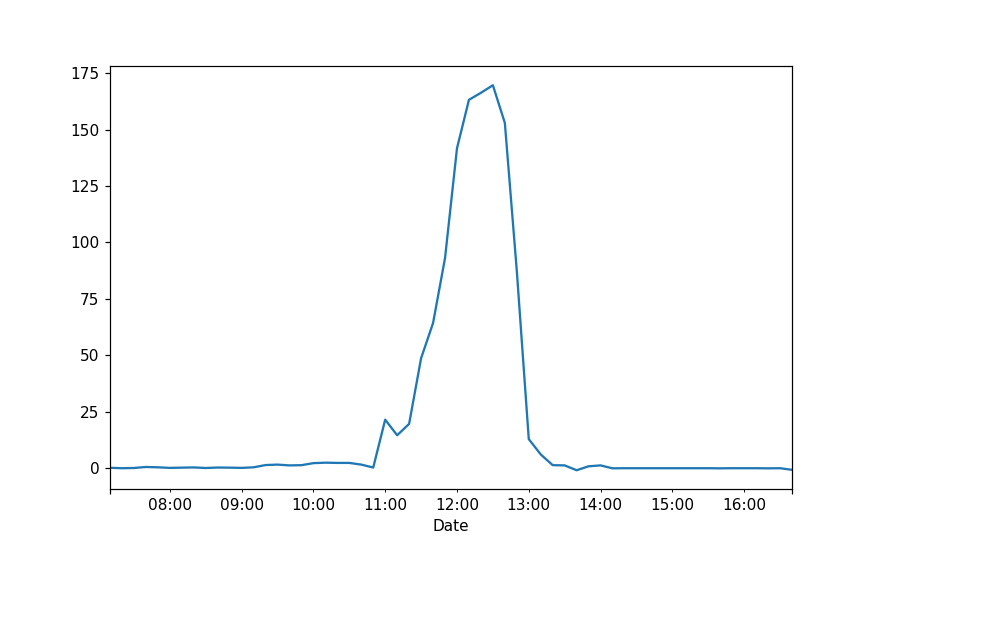

<IPython.core.display.Javascript object>


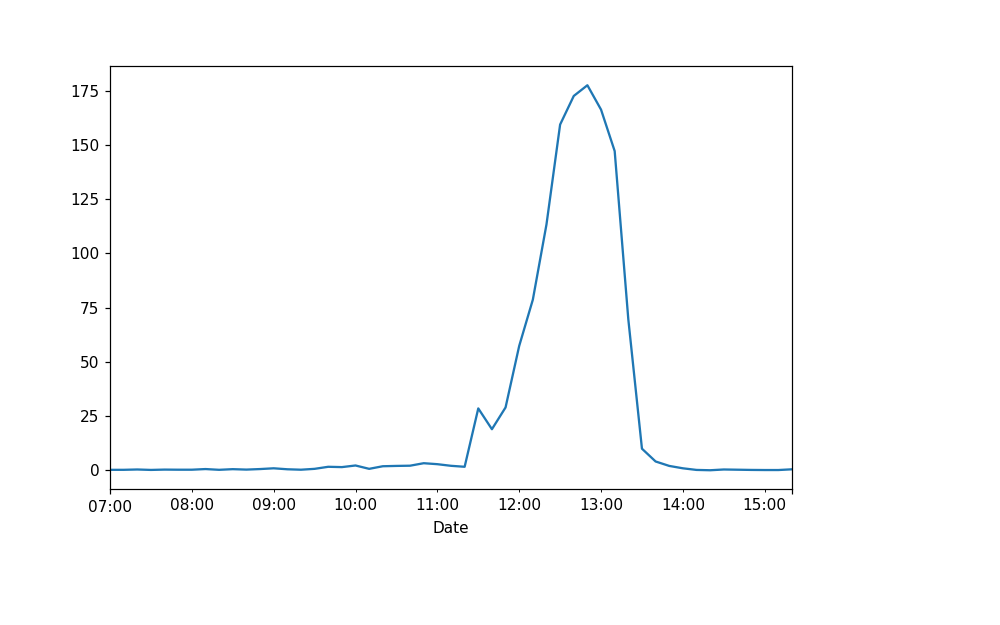

<IPython.core.display.Javascript object>


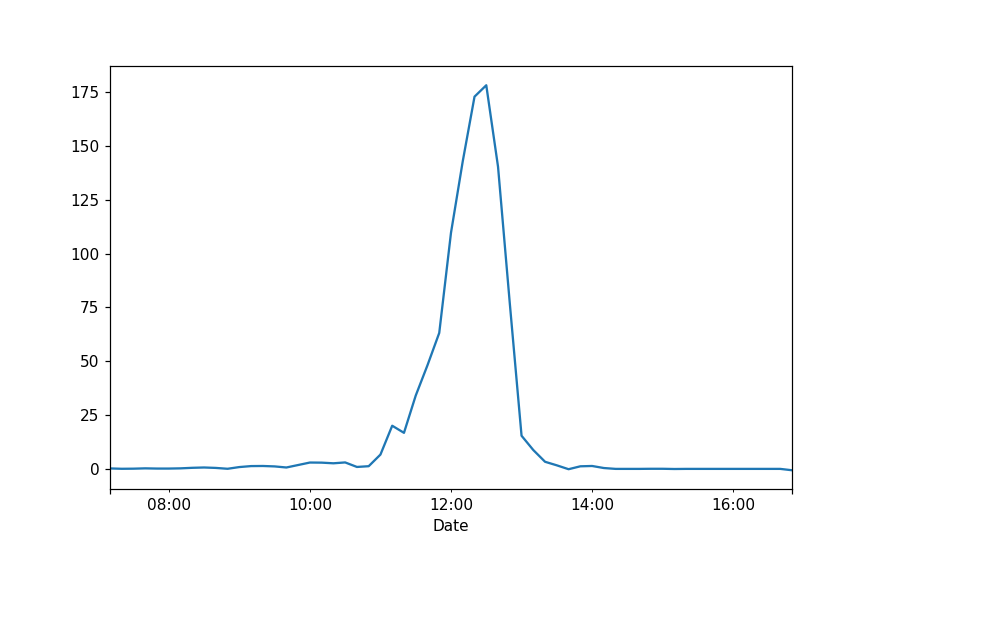

<IPython.core.display.Javascript object>


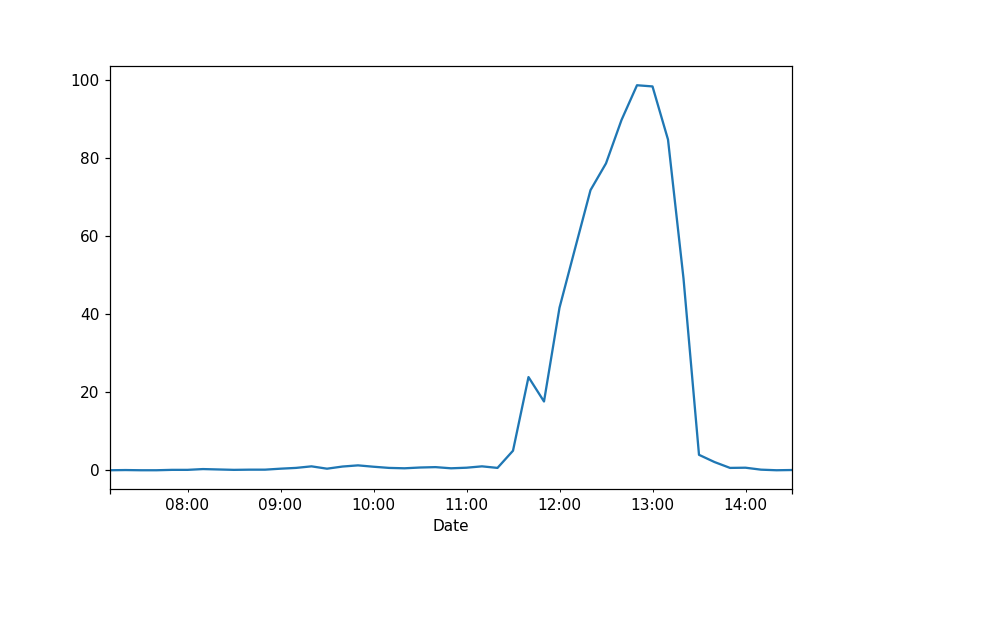

<IPython.core.display.Javascript object>


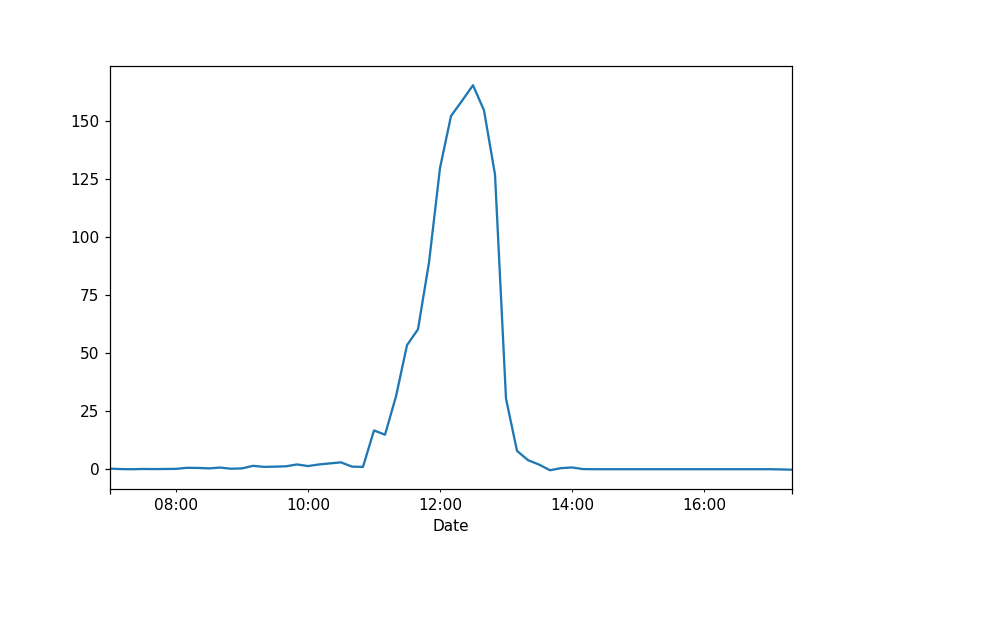

<IPython.core.display.Javascript object>


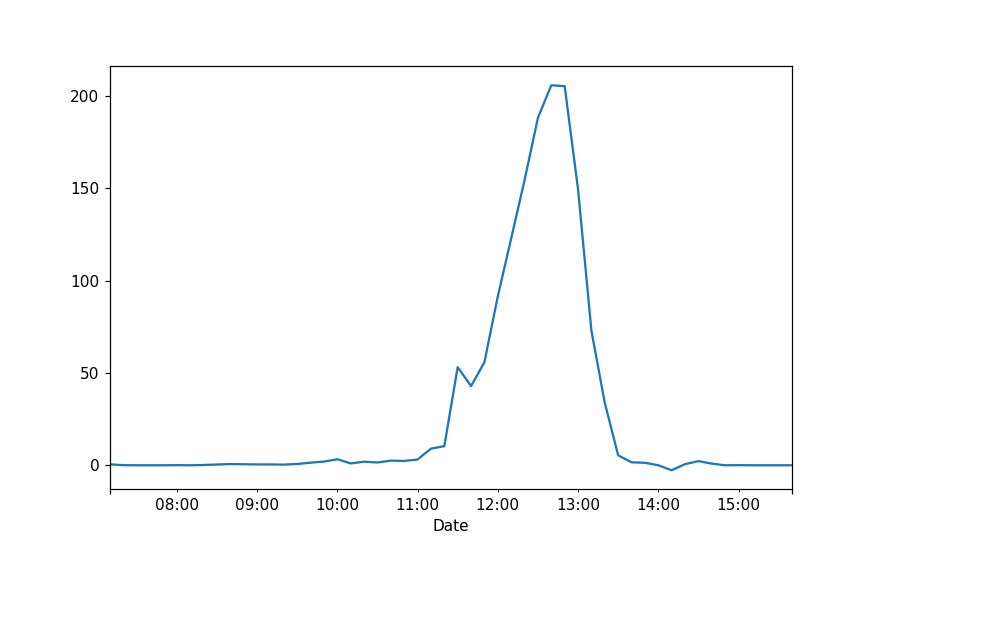

<IPython.core.display.Javascript object>


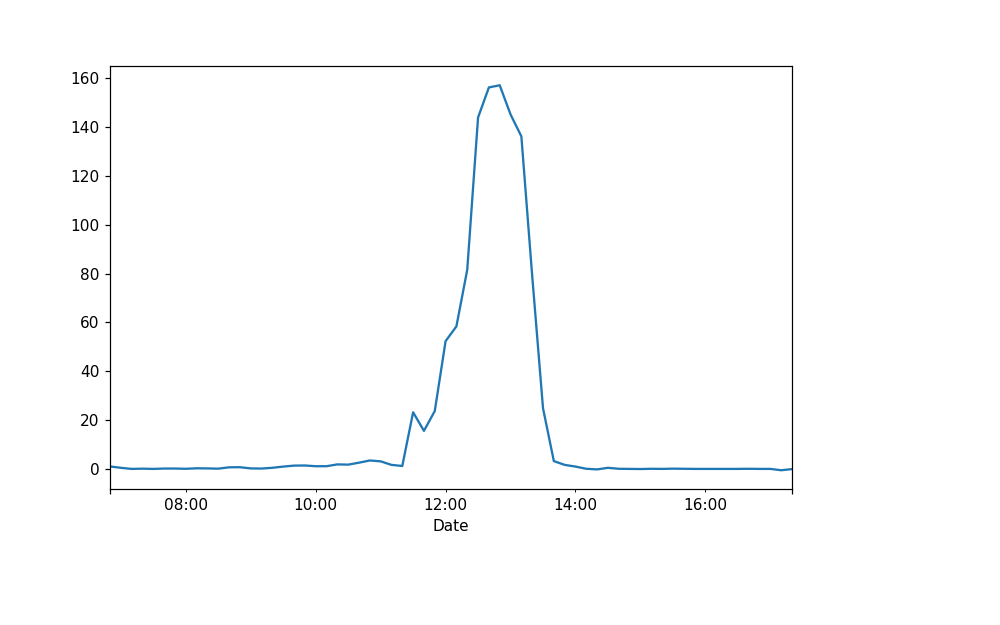

<IPython.core.display.Javascript object>


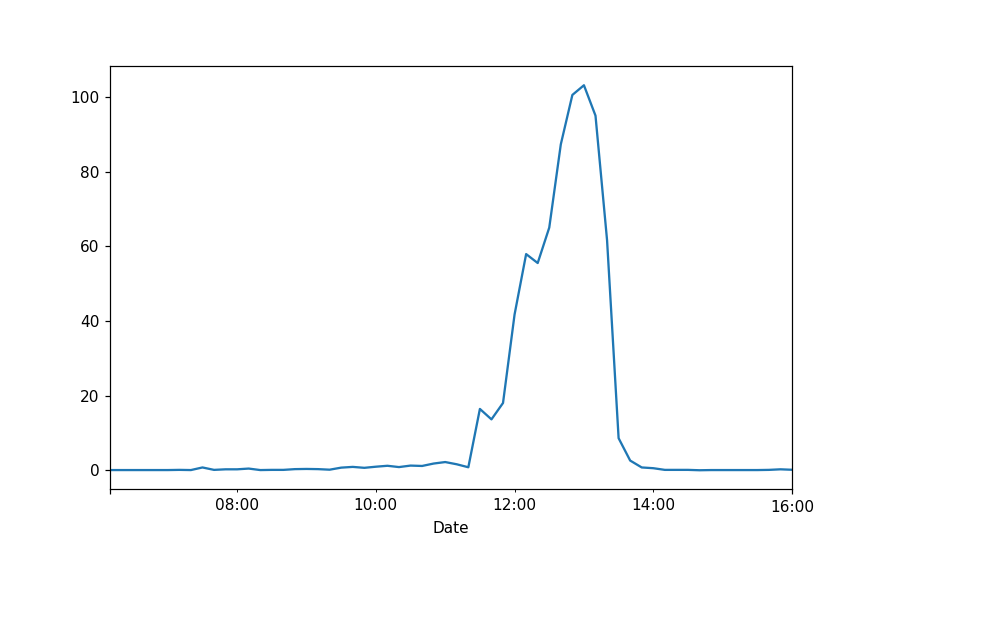

<IPython.core.display.Javascript object>


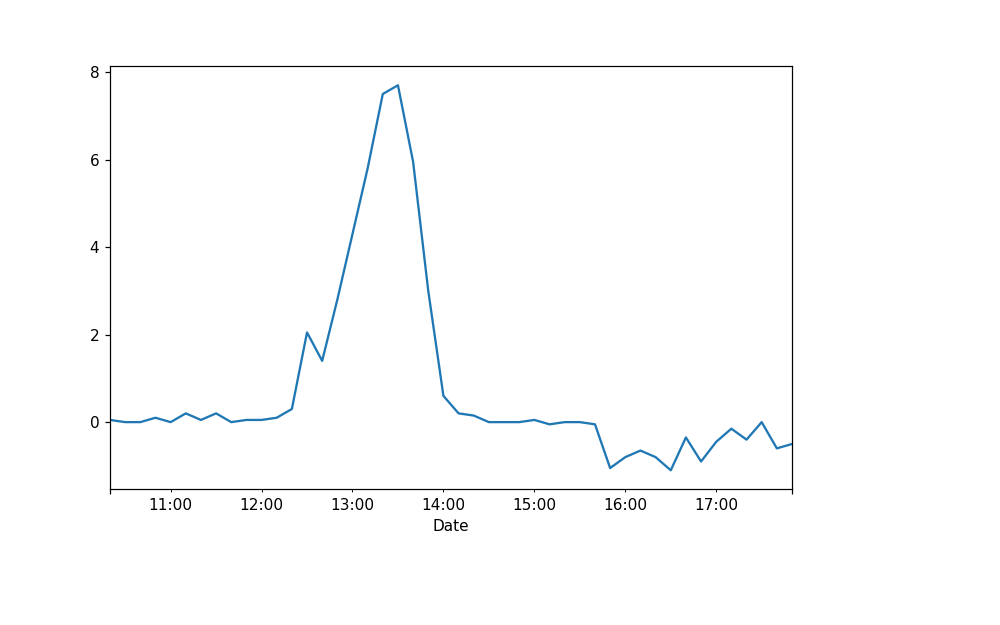

<IPython.core.display.Javascript object>


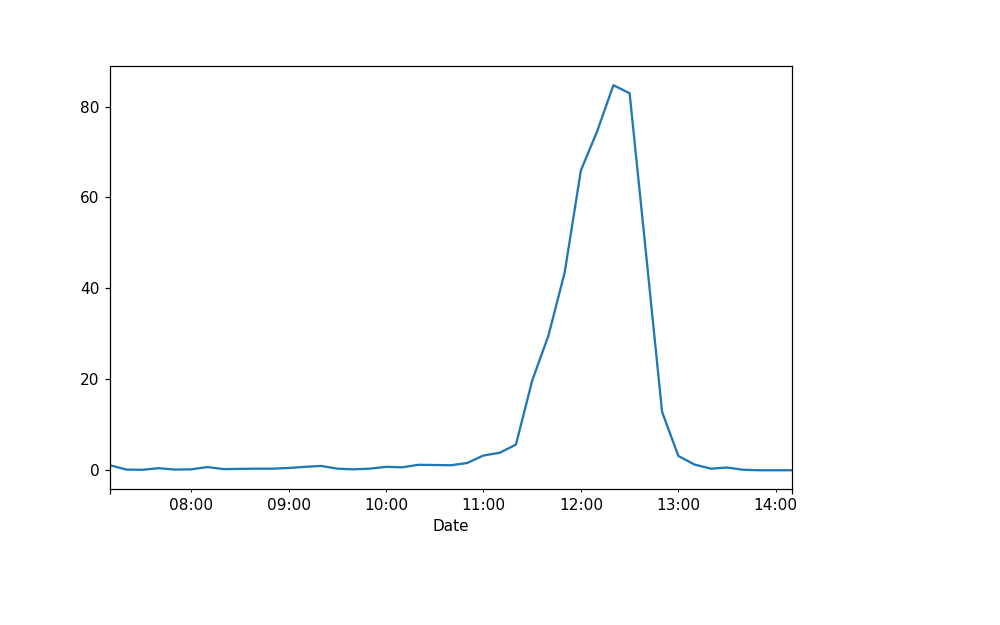

<IPython.core.display.Javascript object>


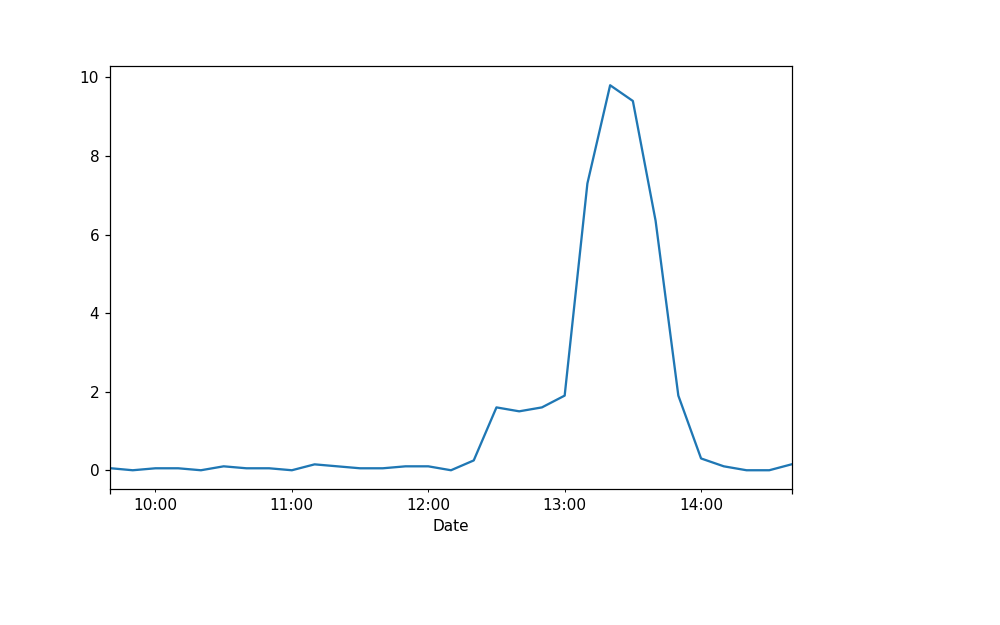

<IPython.core.display.Javascript object>


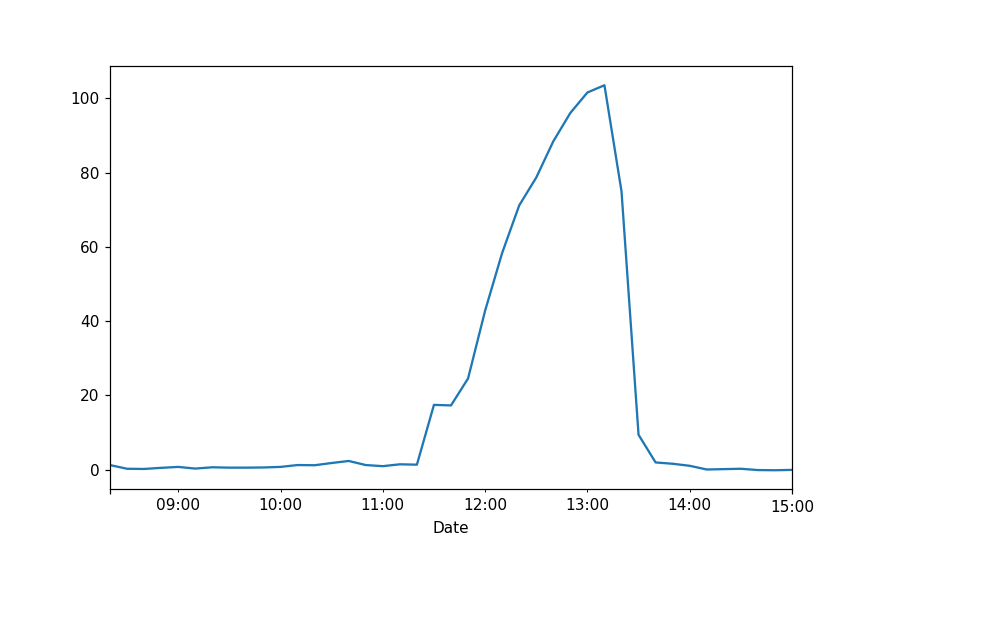

<IPython.core.display.Javascript object>


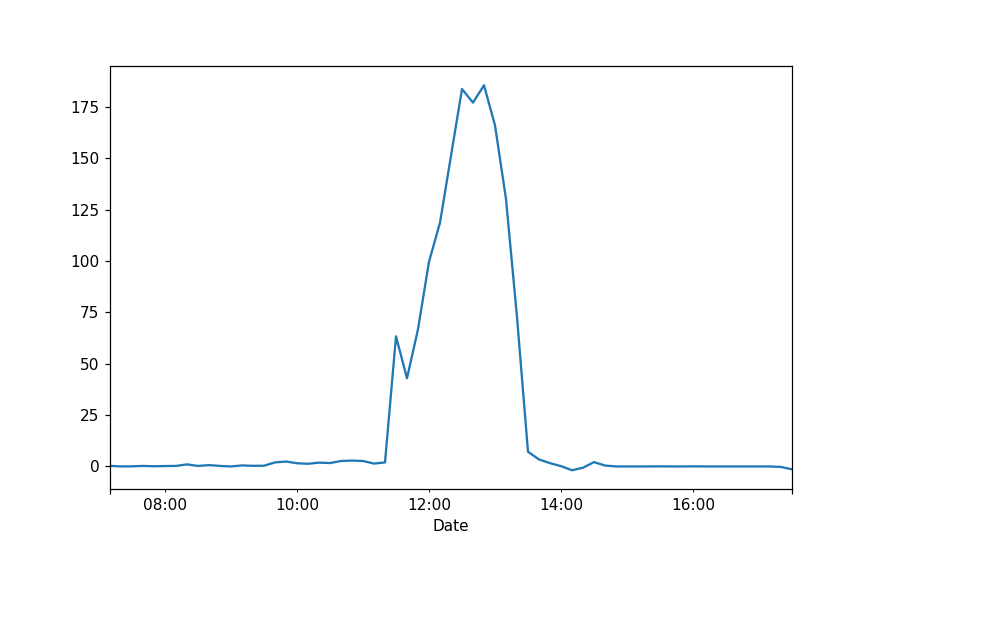

In [69]:
selection = df_etix.loc[df_etix.index.weekday >4]
for gid in selection.gameid.unique():
    plt.figure(figsize=(8,5))
    test = df_etix.loc[df_etix.gameid == gid]
    test.Result.resample('30s').sum().resample('10min').mean().plot()

In [63]:
test = df_etix.loc[df_etix.gameid == 10]

In [55]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


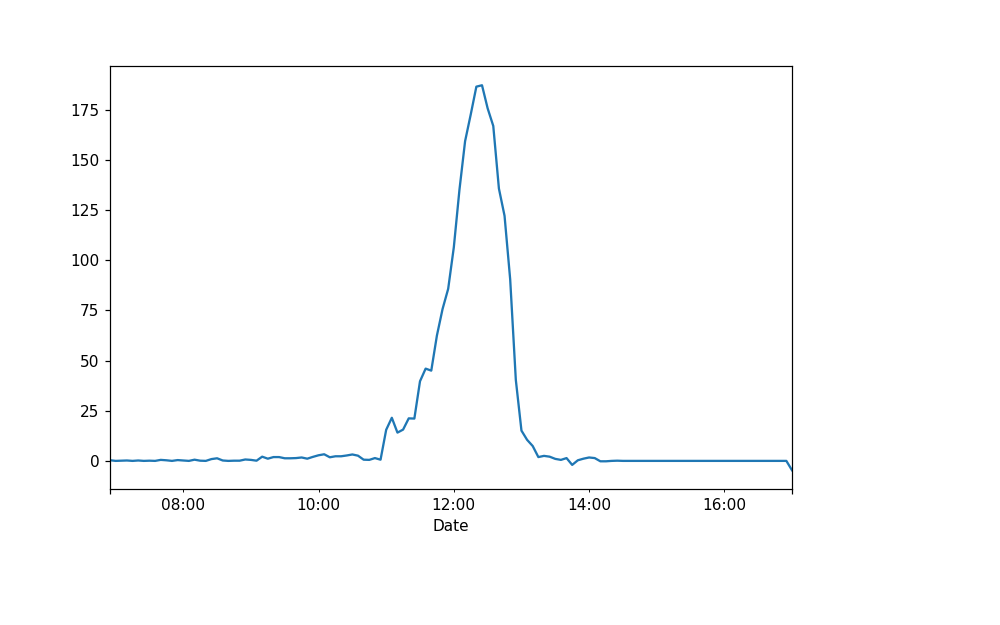

<AxesSubplot:xlabel='Date'>

In [65]:
plt.figure(figsize=(8,5))
#test.Result.resample('30s').sum().plot()
test.Result.resample('30s').sum().resample('5min').mean().plot()

<IPython.core.display.Javascript object>


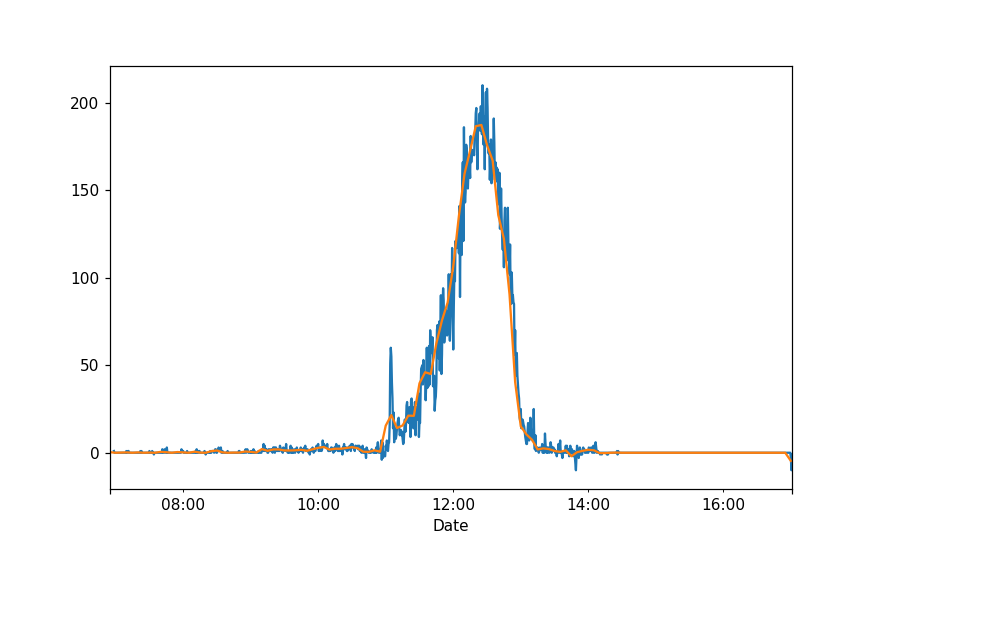

<AxesSubplot:xlabel='Date'>

In [64]:
plt.figure(figsize=(8,5))
test.Result.resample('30s').sum().plot()
test.Result.resample('30s').sum().resample('5min').mean().plot()

In [48]:
test.Result.diff()

Date
2019-05-19 07:10:01    NaN
2019-05-19 07:10:06   -2.0
2019-05-19 07:24:20    2.0
2019-05-19 07:40:19    0.0
2019-05-19 07:40:20    0.0
                      ... 
2019-05-19 16:45:26    2.0
2019-05-19 16:45:29    0.0
2019-05-19 16:48:19    0.0
2019-05-19 16:48:26    0.0
2019-05-19 17:03:10    0.0
Name: Result, Length: 29858, dtype: float64

In [ ]:
df_etix.loc[df_etix.gameid ==1]

<IPython.core.display.Javascript object>


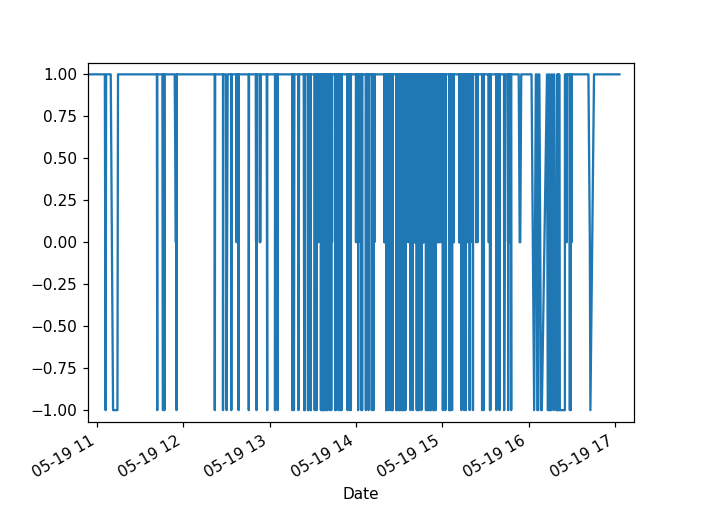

<AxesSubplot:xlabel='Date'>

In [33]:
df_etix.loc[df_etix.gameid ==1].Result.plot()

In [25]:
df_etix.loc[df_etix.gameid ==1].Serial.nunique()

29382

In [26]:
df_etix.loc[df_etix.gameid ==1].Serial.count()

29858

In [9]:
df_etix.Result.unique()

array(['VALID', 'EXIT', 'REENTERED', 'ALREADY', 'NOTIN', 'ALREADYOUT'],
      dtype=object)

In [10]:
# check if enter or exit

In [ ]:
df_etix

In [ ]:
df_etix.Section.unique()

In [ ]:
df_etix.Row.unique()

In [ ]:
df_etix.Seat.unique()

In [ ]:
df_etix.describe().round()

## columns

In [ ]:
df_etix.columns.tolist()

In [ ]:
df_etix.head(5)